# UNAD
## Luis Alberto Salcedo Salas
### Dataset Regresión Lineal – Vehicle dataset

__Pasos de la actividad__

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
1. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
1. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
1. Dividir el dataset en Train y Test para evaluar correctamente el modelo
1. Entrenar el modelo configurando los diferentes hiperparámetros
1. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
1. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
1. Interpretar, analizar y documentar los resultados obtenidos

# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [4]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
# lectura de datos

Data = pd.read_csv('D:/Documentos/Universidad. Ing Sistemas/10 - Semestre/Análisis de datos/Tarea 3/1. Car details v3.csv')

In [6]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [7]:
# Descripción de los datos

Data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Información del formato de la tabla

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
# Se elimina la columna de torque por complejidad del dato

Data = Data.drop(columns=['torque'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [10]:
# Se gestionan las columnas de fuel, seller_type, transmission y owner para cambiarlas a datos numéricos

fuelValues = Data['fuel'].value_counts()
sellerValues = Data['seller_type'].value_counts()
transmissionValues = Data['transmission'].value_counts()
ownerValues = Data['owner'].value_counts()

print(fuelValues)
print(sellerValues)
print(transmissionValues)
print(ownerValues)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


In [11]:
# Se gestionan las columnas de fuel, seller_type, transmission y owner para cambiarlas a datos numéricos

Data['fuel'] = Data['fuel'].map({ 'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3 })
Data['seller_type'] = Data['seller_type'].map({ 'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2 })
Data['transmission'] = Data['transmission'].map({ 'Manual': 0, 'Automatic': 1 })
Data['owner'] = Data['owner'].map({ 'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4 })

fuelValues = Data['fuel'].value_counts()
sellerValues = Data['seller_type'].value_counts()
transmissionValues = Data['transmission'].value_counts()
ownerValues = Data['owner'].value_counts()

print(fuelValues)
print(sellerValues)
print(transmissionValues)
print(ownerValues)

fuel
0    4402
1    3631
2      57
3      38
Name: count, dtype: int64
seller_type
0    6766
1    1126
2     236
Name: count, dtype: int64
transmission
0    7078
1    1050
Name: count, dtype: int64
owner
1    5289
2    2105
3     555
4     174
0       5
Name: count, dtype: int64


In [12]:
# Se gestiona la columna de mileage para asegurar que todos los datos estén en la misma unidad y dato numérico
# kmpl = 0.74 * km/kg

def correctMileage(mileage):
    mileage_str = str(mileage)
    
    if mileage_str.endswith('kmpl'):
        mileage_str = mileage_str.replace('kmpl', '')
        return float(mileage_str)
    elif mileage_str.endswith('km/kg'):
        mileage_str = mileage_str.replace('km/kg', '') 
        return float(mileage_str) * 0.74
    else:
        return mileage 


Data['mileage'] = Data['mileage'].transform(correctMileage)

Data['mileage'].head(10)
        

0    23.400
1    21.140
2    17.700
3    23.000
4    16.100
5    20.140
6    12.802
7    16.100
8    23.590
9    20.000
Name: mileage, dtype: float64

In [13]:
# Se eliminan las cadenas de engine y max_power y se confirman en datos numéricos

def correctEngine(string):
    stringCheck = str(string)
    stringCheck = stringCheck.replace(' CC', '')
    try:
        return float(stringCheck)
    except ValueError:
        return None

def correctMaxPower(string):
    stringCheck = str(string)
    stringCheck = stringCheck.replace(' bhp', '')
    try:
        return float(stringCheck)
    except ValueError:
        return None
    
Data['engine'] = Data['engine'].transform(correctEngine)
Data['max_power'] = Data['max_power'].transform(correctMaxPower)

Data[['engine', 'max_power']].head(10)

,engine,max_power
0,1248.0,74.00
1,1498.0,103.52
2,1497.0,78.00
3,1396.0,90.00
4,1298.0,88.20
5,1197.0,81.86
6,1061.0,57.50
7,796.0,37.00
8,1364.0,67.10
9,1399.0,68.10


In [14]:
# Se identifica que la cantidad de registros es de 8128, sin embargo, hay columnas con datos faltantes

Data['mileage'] = Data['mileage'].fillna(Data['mileage'].mean())
Data['engine'] = Data['engine'].fillna(Data['engine'].mean())
Data['max_power'] = Data['max_power'].fillna(Data['max_power'].mean())
Data['seats'] = Data['seats'].fillna(Data['seats'].mean())

print('Valores vacíos en mileage: ', Data['mileage'].isna().sum())
print('Valores vacíos en engine: ', Data['engine'].isna().sum())
print('Valores vacíos en max_power: ', Data['max_power'].isna().sum())
print('Valores vacíos en seats: ', Data['seats'].isna().sum())


Valores vacíos en mileage:  0
Valores vacíos en engine:  0
Valores vacíos en max_power:  0
Valores vacíos en seats:  0


# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [15]:
# Dando seguimiento al precio de los automoviles por las diferentes características

X = Data.drop(columns=['name', 'selling_price'])
Y = Data['selling_price']

print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0     2014     145500     0            0             0      1    23.40   
1     2014     120000     0            0             0      2    21.14   
2     2006     140000     1            0             0      3    17.70   
3     2010     127000     0            0             0      1    23.00   
4     2007     120000     1            0             0      1    16.10   
...    ...        ...   ...          ...           ...    ...      ...   
8123  2013     110000     1            0             0      1    18.50   
8124  2007     119000     0            0             0      4    16.80   
8125  2009     120000     0            0             0      1    19.30   
8126  2013      25000     0            0             0      1    23.57   
8127  2013      25000     0            0             0      1    23.57   

      engine  max_power  seats  
0     1248.0      74.00    5.0  
1     1498.0     103.52    5.0  
2     1497.0

# Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [16]:
# Realizar separación de datos TRAIN (80%) y datos TEST (20%) utilizando sklearn

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entrenar el modelo configurando los diferentes hiperparámetros

In [17]:
# Crear modelo de regresión logística

regLin_model = LinearRegression()

# Ingresar datos para entrenar el modelo

regLin_model.fit(X_train, Y_train)

LinearRegression()

# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [18]:
# Predicción del modelo

prediction = regLin_model.predict(X_test)

# Calculo de mean_squared_error

MSE = mean_squared_error(Y_test, prediction)

# Calculo de r2_score

R2 = r2_score(Y_test, prediction)

# Calculo de mean_absolute_error

MAE = mean_absolute_error(Y_test, prediction)

print('Medición de diferencia cuadrática entre valores predichos y valores reales (Mean Squared Error): ', MSE)
print('Medición de diferencia absoluta entre valores predichos y valores reales (Mean Absolute Error): ', MAE)
print('Coeficiente de determinación, proporción de variación en la variable dependiente predecible desde las variables independientes: ', R2)

Medición de diferencia cuadrática entre valores predichos y valores reales (Mean Squared Error):  210865410528.2783
Medición de diferencia absoluta entre valores predichos y valores reales (Mean Absolute Error):  269712.3222031987
Coeficiente de determinación, proporción de variación en la variable dependiente predecible desde las variables independientes:  0.6783060015915887


# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

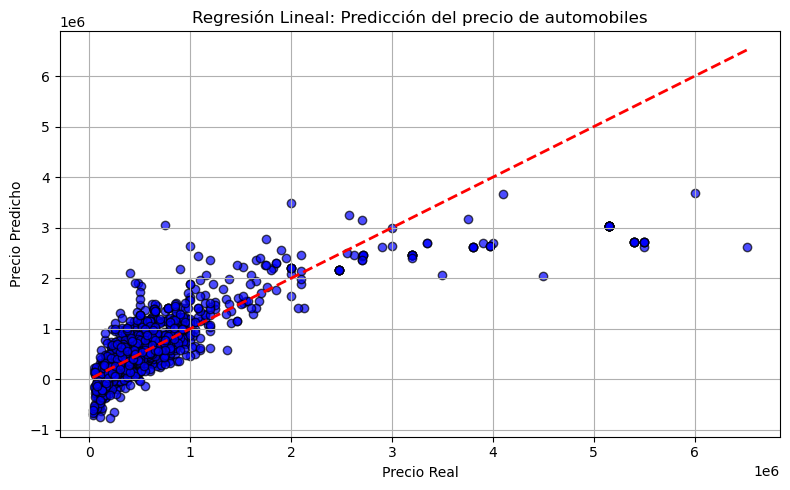

In [19]:
# Gráfico de dispersión de datos y línea del modelo

plt.figure(figsize=(8, 5))
plt.scatter(Y_test, prediction, color='blue', edgecolor='k', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal: Predicción del precio de automobiles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

Conforme a los datos obtenidos posterior a la creación, entrenamiento y evaluación del modelo de datos. Se puede determinar, utilizando el valor de _R2_, que el modelo tiene una confiabilidad del 67 porciento. Ciertamente es un valor adecuado, sin embargo, debe ser posible aumentar su confiabilidad.

En este sentido, el análisis EDA debe ser más riguroso para determinar valores que permanezcan atípicos o puedan afectar la predicción del modelo o la omisión de ciertas características que sean más representativas. Siendo que la regresión lineal asume la independencia entre datos es posible que correlación en los mismos puedan causar la disminución de efectividad del modelo.

En consecuencia, se obtuvo un modelo adecuado pero del cual se estima tiene oportunidades de mejora.